In [7]:
from word_association import WordTable

In [8]:
class Liar():
    def __init__(self, topic, suggestions, players=3, play_num=3):

        self.topic = topic
        self.suggestions = suggestions
        self.players = players
        self.play_num = play_num
        self.round = 1

        self.keywords = []
        self.wordtable = WordTable(category=topic, wordlist=suggestions)

    def resetTable(self):
        self.wordtable.resetScore()

    def myTurn(self):

        sorted_score = sorted(self.wordtable.score.items() , key = lambda x:x[1], reverse=True)
        SWS = self.wordtable.SWS
        DEF = self.wordtable.DEF
        score = self.wordtable.score

        candidates = []
        liar_keywords = {}

        for i in range(5):
            for NP in DEF[sorted_score[i][0]]['NPs']:
                candidates += [word for word, tag in NP if tag.startswith('NN') or tag.startswith('JJ')]
            candidates += [word for word in SWS[sorted_score[i][0]] if SWS[sorted_score[i][0]][word][1] == 0]

        for c in candidates:
            liar_keywords[c] = sum(SWS[word][c][0] * score[word] for word in score)

        sorted_keywords = sorted(liar_keywords.items(), key=lambda x: x[1], reverse=True)
        liar_sentence = [word 
                         for word, s in sorted_keywords 
                         if word not in self.topic and word not in self.wordtable.score and word not in self.keywords][:3]
        print(f'{self.play_num}: ', ', '.join(liar_sentence))

    def others(self, description):
        self.keywords += self.wordtable.sentenceScore(description)

    def endofGame(self):
        self.wordtable.plot()
        print("The answer is {}.".format(max(self.wordtable.score, key=lambda x: self.wordtable.score[x])))



In [9]:
class Player():
    def __init__(self, topic, suggestions, answer, players, play_num):

        self.topic = topic
        self.suggestions = suggestions
        self.answer = answer
        self.players = players
        self.play_num = play_num
        self.keywords = []

        self.liarscore = {}
        for i in range(1, players+1):
            if i != play_num:
                self.liarscore[i] = 0
        self.wordtable = WordTable(category=topic, wordlist=suggestions)
    
    def resetTable(self):
        self.wordtable.resetScore()

    def myTurn(self):
        
        SWS = self.wordtable.SWS
        DEF = self.wordtable.DEF
        score = self.wordtable.score

        candidates = []
        player_keywords = {}

        for NP in DEF[self.answer]['NPs']:
            candidates += [word for word, tag in NP if tag.startswith('NN') or tag.startswith('JJ')]
        candidates += [word for word in SWS[self.answer] if SWS[self.answer][word][1] == 0]

        for c in candidates:
            player_keywords[c] = sum(SWS[word][c][0] for word in score)

        sorted_keywords = sorted(player_keywords.items(), key=lambda x: x[1], reverse=True)
        player_sentence = [word 
                           for word, s in sorted_keywords 
                           if word not in self.topic and word not in self.wordtable.score and word not in self.keywords][:3]
        print(f'{self.play_num}: ', ', '.join(player_sentence))

    def others(self, description, player):
        self.wordtable.resetScore()
        self.keywords += self.wordtable.sentenceScore(description)
        
        for word in self.wordtable.score:
            self.liarscore[player] += self.wordtable.score[word] - self.wordtable.score[self.answer]

    def endofGame(self):
        print("Liar is player{}".format(max(self.liarscore)))

In [10]:
topic = 'animals'
suggestions = ['bellbird', 'pangolin', 'giraffe', 'horse', 'pelican', 'quail', 'salamander', 'greenland shark', 'gecko', 'oriole', 'zebra', 'sperm whale', 'plover', 'elephant seal', 'albatross', 'macaw', 'junco', 'eel', 'woodpecker', 'corn snake', 'tiger', 'ray', 'rooster', 'dog', 'hawk']
player1 = Player(topic=topic, suggestions=suggestions, answer='giraffe', players=4, play_num=2)
player2 = Player(topic=topic, suggestions=suggestions, answer='giraffe', players=4, play_num=3)
player3 = Player(topic=topic, suggestions=suggestions, answer='giraffe', players=4, play_num=4)
liar = Liar(topic=topic, suggestions=suggestions, players=3, play_num=3)

Liar: it can be cute

Person: It has some patterns on skin

Person: It has four legs.

Person: It is not common around the world.

Liar: this animal has a tail.

Person: This animal is relatively big.

Person: This animal is mainly yellow.

Person: This animal is not easy to see in Korea.


3:  several, tropical, American
2:  Africa, tree, spotted
3:  Africa, tree, spotted
4:  Africa, tree, spotted
3:  Africa, neck, long neck
2:  Africa, tree, spotted
3:  Africa, tree, spotted
4:  Africa, tree, spotted
Liar is player4
Liar is player4
The answer is giraffe.


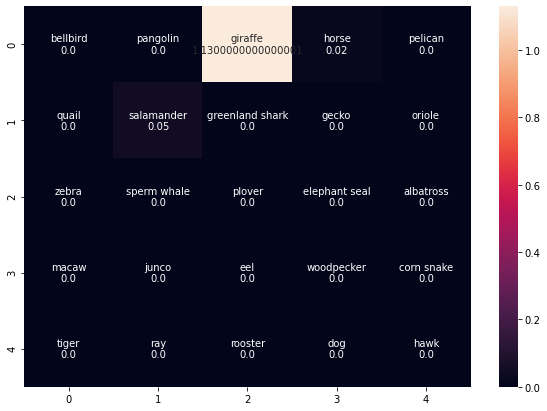

In [11]:
player1.resetTable()
player2.resetTable()
player3.resetTable()
liar.resetTable()

liar.myTurn()
player1.others('It can be cute.', 1)
player2.others('It can be cute.', 1)
player3.others('It can be cute.', 1)

liar.others('It has some patterns on skin.')
player1.myTurn()
player2.others('It has some patterns on skin.', 2)
player3.others('It has some patterns on skin.', 2)

liar.others('It has four legs.')
player1.others('It has four legs.', 3)
player2.myTurn()
player3.others('It has four legs.', 3)

liar.others('It is not common around the world.')
player1.others('It is not common around the world.', 4)
player2.others('It is not common around the world.', 4)
player3.myTurn()

liar.myTurn()
player1.others('It has a tail.', 1)
player2.others('It has a tail.', 1)
player3.others('It has a tail.', 1)

liar.others('It is relatively big.')
player1.myTurn()
player2.others('It is relatively big.', 2)
player3.others('It is relatively big.', 2)

liar.others('It is mainly yellow.')
player1.others('It is mainly yellow.', 3)
player2.myTurn()
player3.others('It is mainly yellow.', 3)

liar.others('It is is not easy to see in Korea.')
player1.others('It is not easy to see in Korea.', 4)
player2.others('It is not easy to see in Korea.', 4)
player3.myTurn()

player1.endofGame()
player2.endofGame()
liar.endofGame()